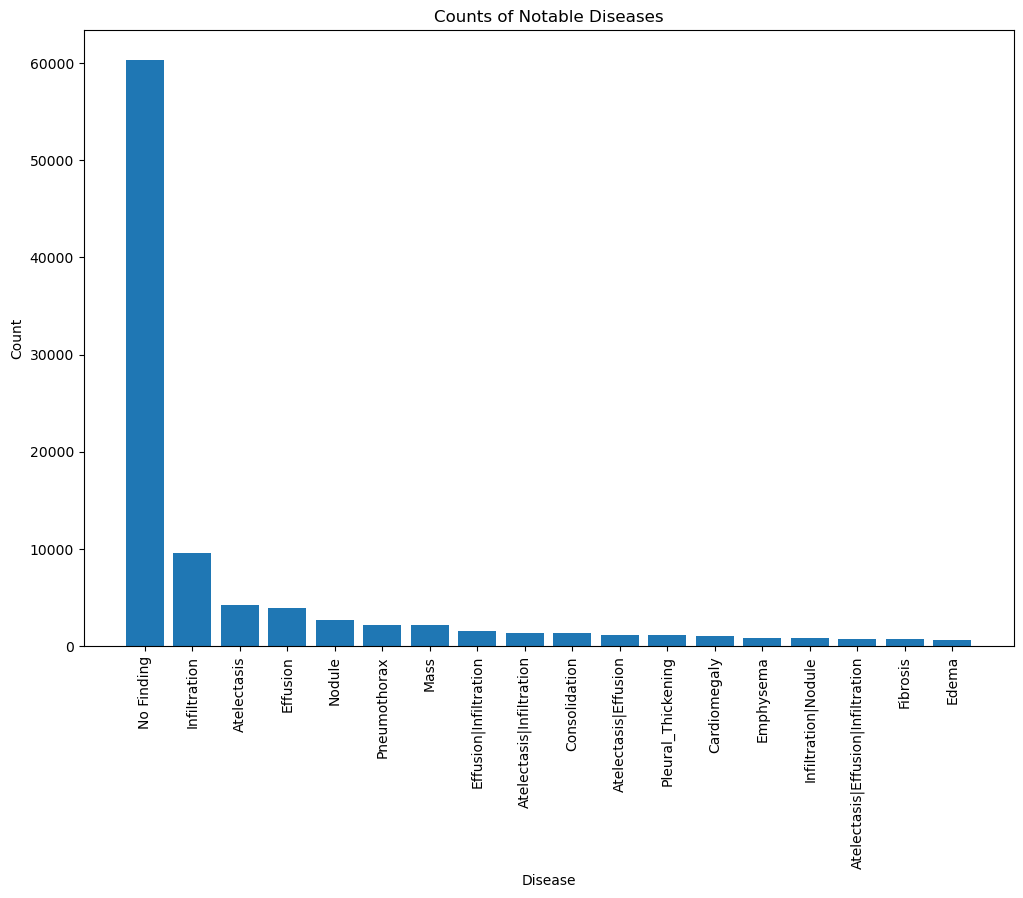

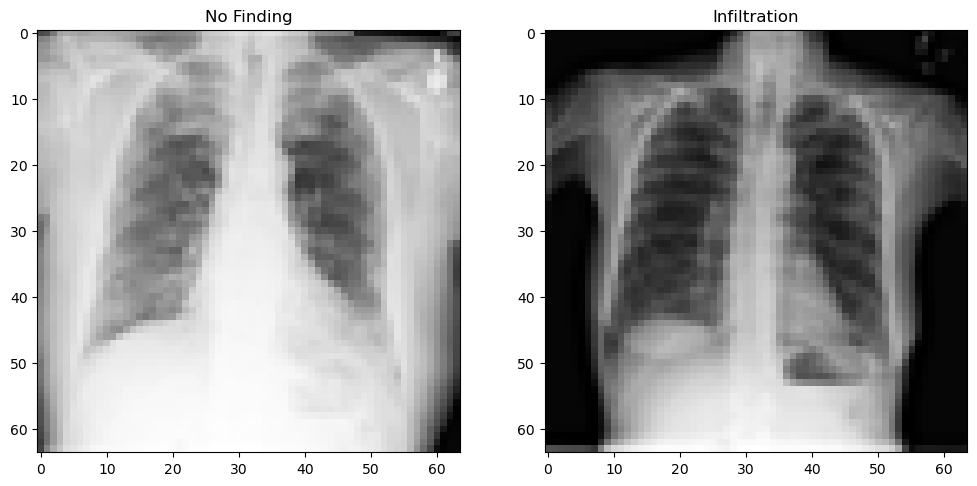

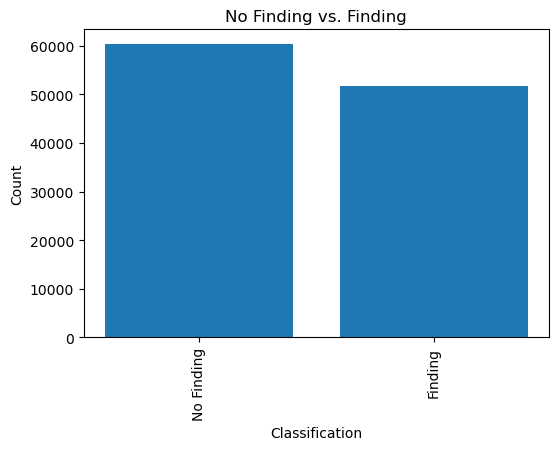

In [9]:
# Data Exploration

# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read Data
data = np.load('array_data/data_64.npy',allow_pickle=True)
labels = np.load('array_data/labels.npy',allow_pickle=True)

# Label Counts
## array to series
label_ser = pd.Series(labels)
## create counts
label_counts = label_ser.value_counts()
## filter counts (>500)
label_counts_filt = label_counts[label_counts > 500]
## plot
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts_filt))+0.5, label_counts_filt)
ax1.set_xticks(np.arange(len(label_counts_filt))+0.5)
_ = ax1.set_xticklabels(label_counts_filt.index, rotation = 90)
ax1.set_xlabel('Disease')
ax1.set_ylabel('Count')
ax1.set_title('Counts of Notable Diseases')
plt.show() # Infiltration is the highest, but notably less than no finding

# Compare Normal to Infiltration
## subset
nofinding = data[:,np.where(labels=='No Finding')[0][0]]
## subset
infiltration = data[:,np.where(labels=='Infiltration')[0][0]]
## plot
fig, ax = plt.subplots(1,2,figsize = (12, 8))
ax[0].imshow(nofinding.reshape((64,64)),
          cmap='gray')
ax[1].imshow(infiltration.reshape((64,64)),
          cmap='gray')
ax[0].set_title('No Finding')
ax[1].set_title('Infiltration')
plt.show()

# No Disease vs. Disease
## create dict
counts = {'No Finding': sum(labels == 'No Finding'),
         'Finding': sum(labels != 'No Finding')}
## dict to series
count_ser = pd.Series(counts)
# plot
fig, ax1 = plt.subplots(1,1,figsize = (6, 4))
ax1.bar(np.arange(len(count_ser))+0.5, count_ser)
ax1.set_xticks(np.arange(len(count_ser))+0.5)
_ = ax1.set_xticklabels(count_ser.index, rotation = 90)
ax1.set_xlabel('Classification')
ax1.set_ylabel('Count')
ax1.set_title('No Finding vs. Finding')
plt.show() # no finding vs. finding are relatively comparable